In [1]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
#Reading the CSV file
data=pd.read_csv(r"C:/Users/Dell/Desktop/ML-MAJOR/ipl2017.csv")

In [3]:
#loading few values
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
#check for 'n/a' in the entire dataset 
data.isnull().values.any()

False

In [5]:
#checking for null values and datatype in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [6]:
#Once again checking for missing values
data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [7]:
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


<AxesSubplot:>

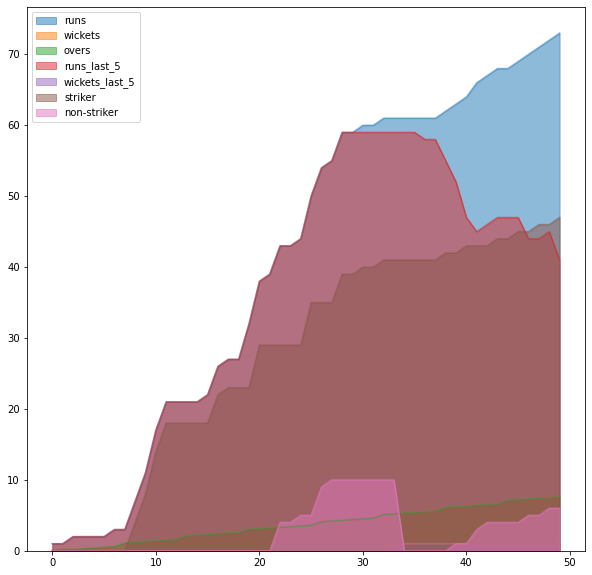

In [8]:
# plot area / contributions in dataset
data[['date','venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker']][:50].plot(kind = 'area', figsize = (10,10), stacked = False)

#### Removing irrelevant columns 

In [9]:
cols_to_remove = ['mid' , 'venue' , 'batsman', 'bowler', 'striker', 'non-striker']
data.drop(labels=cols_to_remove , axis=1 , inplace = True)

In [10]:
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [12]:
consistent_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [13]:
data = data[(data['bat_team'].isin(consistent_team)) & (data['bowl_team'].isin(consistent_team))]

### Important Hypothesis 
One of the important hypothesis for this project is that we could make the prediction for the match only when a few overs have passed by. In my opinion we can successfully make prediction after 10 overs so we will filter out the overs after 7.

In [14]:
data = data[data["overs"]>=10.0]

In [15]:
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
62,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,88,1,10.1,27,1,222
63,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,92,1,10.2,31,0,222
64,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,92,1,10.3,31,0,222
65,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,98,1,10.4,37,0,222
66,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,98,1,10.5,37,0,222


In [16]:
# converting date cols from string to date time object
from datetime import datetime
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

In [17]:
# converting categorical features using 'One Hot Encoding' # for numerical values
cat_df = pd.get_dummies(data = data, columns = ['bat_team' , 'bowl_team'])

In [18]:
cat_df.head(2)

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
62,2008-04-18,88,1,10.1,27,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
63,2008-04-18,92,1,10.2,31,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
# split the data into train and test set - based on date column
X_train = cat_df.drop(labels = 'total', axis = 1)[cat_df['date'].dt.year <= 2016]
X_test = cat_df.drop(labels = 'total', axis = 1) [cat_df['date'].dt.year >= 2017]

In [20]:
# since only one column so cosidered as series
y_train = cat_df[cat_df['date'].dt.year <= 2016]['total'].values
y_test = cat_df[cat_df['date'].dt.year >= 2017]['total'].values

In [21]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(24755, 22) (24755,)
(1853, 22) (1853,)


In [22]:
# since the requirement of our date column is over so we can drop it
# dropping date column
X_train.drop(labels = 'date', axis = True, inplace = True)
X_test.drop(labels = 'date', axis = True, inplace = True)

In [23]:
model=RandomForestRegressor(n_estimators=100,random_state=0)

In [24]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [25]:
prediction = model.predict(X_test)

In [26]:
print(prediction)

[190.71 191.94 169.72 ... 117.   114.39 113.61]


In [27]:
print('MAE: ', metrics.mean_absolute_error(y_test , prediction))

MAE:  11.446769652815254


In [28]:
print('MSE: ', metrics.mean_squared_error(y_test, prediction))

MSE:  240.2865622927535


In [29]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

RMSE:  15.50117938392926


In [31]:
print(model.score(X_test,y_test))

0.7559783093343251
